<font color='yellow'>Clone repository on google colab </font>

In [1]:
!git clone https://github.com/clovaai/deep-text-recognition-benchmark

Cloning into 'deep-text-recognition-benchmark'...
remote: Enumerating objects: 499, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 499 (delta 208), reused 200 (delta 200), pack-reused 274 (from 1)
Receiving objects: 100% (499/499), 3.05 MiB | 28.96 MiB/s, done.
Resolving deltas: 100% (308/308), done.


In [2]:
%cd deep-text-recognition-benchmark

/content/deep-text-recognition-benchmark


<font color='yellow'>Download a pre-trained model </font>

In [3]:
!gdown 1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9

Downloading...
From (original): https://drive.google.com/uc?id=1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9
From (redirected): https://drive.google.com/uc?id=1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9&confirm=t&uuid=0393e552-8ac1-43e3-bb7c-c3989643cd4e
To: /content/deep-text-recognition-benchmark/TPS-ResNet-BiLSTM-Attn.pth
100% 199M/199M [00:03<00:00, 62.8MB/s]


In [4]:
!pip install lmdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 6.9 MB/s eta 0:00:00


<font color='yellow'>Unzip datasets from: https://github.com/mut-deep/IR-LPR?tab=readme-ov-file </font>

In [1]:
!unzip /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/plate_img-train.zip -d /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/train/24244.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/train/24244.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/train/24245.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/train/24245.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/train/24249.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/train/24249.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/t

In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/plate_img-validation.zip -d /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/validation/02835.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/validation/02835.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/validation/02845.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/validation/02845.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/validation/02855.jpg  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/validation/02855.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_P

<font color='yellow'>Make a txt file from xml files </font>

In [ ]:
import os
import xml.etree.ElementTree as ET
from lxml import etree
# Directory containing XML files


dict = {
        'الف':'A',
        'ب':'B',
        'پ':'P',
        'ت':'T',
        'ث':'Y',
        'ز':'Z',
        'ش': 'X',
        'ع': 'E',
        'ف': 'F',
        'ک': 'K',
        'گ': 'G',
        'D': 'D',
        'S': 'S',
        'ج': 'J',
        'د': 'W',
        'س': 'C',
        'ص': 'U',
        'ط': 'R',
        'ق': 'Q',
        'ل': 'L',
        'م': 'M',
        'ن': 'N',
        'و': 'V',
        'ه': 'H',
        'ی': 'I',
        '0': '0',
        '1': '1',
        '2': '2',
        '3': '3',
        '4': '4',
        '5': '5',
        '6': '6',
        '7': '7',
        '8': '8',
        '9': '9',
}
xml_dir = '/content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/train'

output_txt_file = '/content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/gt_train2.txt'

os.makedirs(os.path.dirname(output_txt_file), exist_ok=True)


def extract_and_write_names(xml_file, txt_file):
    parser = etree.XMLParser(encoding="utf-8")
    tree = etree.parse(xml_file, parser=parser)
    root = tree.getroot()


    xml_file_name = os.path.splitext(os.path.basename(xml_file))[0]

    with open(txt_file, 'a', encoding='utf-8') as txt_file:
        txt_file.write(f"train/{xml_file_name}.jpg")
        txt_file.write("\t")
        for name_element in root.iter('name'):
            name = name_element.text.strip() if name_element.text else ""
            if name in dict:
                txt_file.write(f"{dict[name]}")
            else:
                txt_file.write("@")
        txt_file.write("\n")

for xml_file_name in os.listdir(xml_dir):
    if xml_file_name.endswith('.xml'):

        xml_file_path = os.path.join(xml_dir, xml_file_name)

        extract_and_write_names(xml_file_path, output_txt_file)

print("Extraction completed. Names written to:", output_txt_file)

<font color='yellow'>Create persian license plate lmdb dataset </font>

In [5]:
!pip3 install fire

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=b1a3cd7dbb05ed9f76027db2748b312c26b0f19c84195be370f7b1309bf93f42
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


<font color='yellow'>Create train and validation lmdb datasets </font>

In [5]:
!python3 create_lmdb_dataset.py \
--inputPath /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset \
--gtFile /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/gt_train.txt \
--outputPath /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/dataset_mdb/train

Written 1000 / 19381
Written 2000 / 19381
Written 3000 / 19381
Written 4000 / 19381
Written 5000 / 19381
Written 6000 / 19381
Written 7000 / 19381
Written 8000 / 19381
Written 9000 / 19381
Written 10000 / 19381
Written 11000 / 19381
Written 12000 / 19381
Written 13000 / 19381
Written 14000 / 19381
Written 15000 / 19381
Written 16000 / 19381
Written 17000 / 19381
Written 18000 / 19381
Written 19000 / 19381
Created dataset with 19381 samples


In [ ]:
!python3 create_lmdb_dataset.py \
--inputPath /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset \
--gtFile /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/plp_dataset/gt_validation.txt \
--outputPath /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/dataset_mdb/validation

Written 1000 / 2805
Written 2000 / 2805
Created dataset with 2805 samples


<font color='yellow'>Train model on lmdb datasets </font>

In [6]:
!python3 train.py \
--train_data /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/dataset_mdb/train --valid_data /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/dataset_mdb/validation \
--select_data / --batch_ratio 1 --batch_max_length 8 --valInterval 500 --num_iter 4500\
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/dataset_mdb/train
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/Colab_Notebooks/PyLearn7-Assignment57/Persian_License_Plate_Recognition/dataset_mdb/train	 dataset: /
sub-directory:	/.	 num samples: 18147
num total samples of /: 18147 x 1.0 (total_data_usage_ratio) = 18147
num samples of / per batch: 192 x 1.0 (batch_ratio) = 192
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is s

<font color='yellow'>Inference </font>

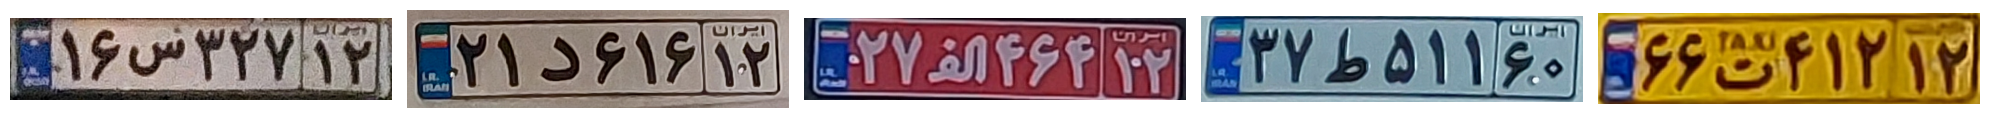

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = [
    "/content/test_images/16C32712.jpg",
    "/content/test_images/21W61612.jpg",
    "/content/test_images/27A46412.jpg",
    "/content/test_images/37R51160.jpg",
    "/content/test_images/66T41212.jpg",
]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, ax in enumerate(axes):
    img = mpimg.imread(image_paths[i])
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
!python3 demo.py \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder /content/test_images \
--saved_model /content/deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth

model input parameters 32 100 20 1 512 256 38 25 TPS ResNet BiLSTM Attn
loading pretrained model from /content/deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
--------------------------------------------------------------------------------
image_path               	predicted_labels         	confidence score
--------------------------------------------------------------------------------
/content/test_images/16C32712.jpg	16c32712                 	0.9959
/content/test_images/21W61612.jpg	21w6161